In [76]:
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import plotly.plotly as py
# import plotly.graph_objs as go
import sympy
#from sympy.printing import latex as lt
# plotly.plotly.sign_in("joknowle", "h1w8dn6q7h")
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'calibri', 'mathtext.fontset': 'stix'})
init_printing(use_latex='mathjax')
#init_printing()

In [122]:
## Eqn 3.28: S:entropy, k:boltzman's constant, N:oscillators, F: S/k
Nu, Nd, k, No, mu, B, U, T = symbols('N_u N_d k N mu B U T', Integer=True)
S1, S2, invT, M, M2, CB, U1, U2 = symbols('S/k S/k (1/T) M M C_B U U') #, cls=Function broke code... wut.
#S1(N, Nu); S2(N, Nu); invT(k, mu, B, N); M(mu, B, k, T); M2(U, B); CB(N, k, mu, B, T); U1(mu, B, N, Nu);

#S1.subs([(N,3),(Nu,2)])

#CB = (N*k*(((mu*B)/(k*T))**2/(cosh((mu*B)/(k*T))**2))).as_ordered_terms()
#with evaluate(False):
#    CB = N*k*(((mu*B)/(k*T))**2/(cosh((mu*B)/(k*T))**2))
#print(latex(S1),'\n',latex(S2),'\n',latex(invT),'\n',latex(M),'\n',latex(CB))

In [123]:
from IPython.display import display, Math, Latex
display(Math(
r"""
\begin{equation}
\frac{S}{k} = \log{\left (N! \right )} - \log{\left (N_{u}! \right )} - \log{\left (\left(N - N_{u}\right)! \right )} 
\qquad = \qquad N \log{\left (N \right )} - N_{u} \log{\left (N_{u} \right )} - \left(N - N_{u}\right) \log{\left (N - N_{u} \right )} \\
\frac{1}{T} = \frac{k}{2 B \mu} \log{\left (\frac{N - \frac{U}{B \mu}}{N + \frac{U}{B \mu}} \right )} \\
M =  N \mu \tanh{\left (\frac{B \mu}{T k} \right )} \\
C_B =  N k \frac{\left(\frac{B \mu}{T k}\right)^{2}}{\cosh^{2}{\left (\frac{B \mu}{T k} \right )}} \\
\end{equation}
"""))

<IPython.core.display.Math object>

In [149]:
eqn1 = Eq(S1, log(factorial(No)) - log(factorial(Nu)) - log(factorial(No-Nu)))
eqn2 = Eq(S2, No*log(N) - Nu*log(Nu) - (No - Nu)*log(No-Nu))
eqn3 = Eq(invT, k/(2*mu*B)*log((No - U/(mu*B))/(No + U/(mu*B))))
eqn4 = Eq(M, No*mu*tanh((mu*B)/(k*T)))
eqn5 = Eq(M2, -U/B)
eqn6 = Eq(CB, No*k*(((mu*B)/(k*T))**2/(cosh((mu*B)/(k*T))**2)))
eqn7 = Eq(U1, (mu*B*(No - 2*Nu)))
eqn8 = Eq(U2/(mu*B), No - 2*Nu)
help(sympy.Atom)
#type(S(eqn8).as_independent(U2))
#(eqn8).as_independent(B)
#print(type(a[0]), type(a)) ## Need sympy instance still. 
#isinstance(a, tuple(core.all_classes))

Help on class Atom in module sympy.core.basic:

class Atom(Basic)
 |  A parent class for atomic things. An atom is an expression with no subexpressions.
 |  
 |  Examples
 |  ========
 |  
 |  Symbol, Number, Rational, Integer, ...
 |  But not: Add, Mul, Pow, ...
 |  
 |  Method resolution order:
 |      Atom
 |      Basic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  doit(self, **hints)
 |      Evaluate objects that are not evaluated by default like limits,
 |      integrals, sums and products. All objects of this kind will be
 |      evaluated recursively, unless some species were excluded via 'hints'
 |      or unless the 'deep' hint was set to 'False'.
 |      
 |      >>> from sympy import Integral
 |      >>> from sympy.abc import x
 |      
 |      >>> 2*Integral(x, x)
 |      2*Integral(x, x)
 |      
 |      >>> (2*Integral(x, x)).doit()
 |      x**2
 |      
 |      >>> (2*Integral(x, x)).doit(deep = False)
 |      2*Integral(x, x)
 |  
 |  matches(self, exp

In [161]:
newM = eqn5.rhs.subs(U, eqn7.rhs)
newM.atoms()
#newM
#type(symbols('a b', integer = True))

tuple

In [93]:
iNu = solve(newM - M, Nu)
iNu[0]

M + N⋅μ
───────
  2⋅μ  

In [105]:
newS = eqn2.rhs.subs(Nu, iNu[0])
newS
type(newS)
#newS.args[0:3]
#type(np.real(newS))
#repr(newS)
#type(np.real(eqn8.rhs))
#S(newS)

sympy.core.add.Add

In [104]:
Rational(eqn8[0], newS[0])

TypeError: 'Equality' object does not support indexing

In [97]:
#Nz = np.linspace(0,100,32); Nuz = np.linspace(0,100,32); muz = 1; Mz = Nuz;
#type(N)
#type(eqn8.rhs.as_coeff_add())
#newS.as_coeff_add()
plt.plot(np.float(S(eqn8.rhs))) #, (N, -100, 100), (Nu, -100, 100), (B, 1, 1), (mu, 1, 1)
#plt.show()

TypeError: can't convert expression to float

In [213]:
solve(invT - 1/T, U/(mu*B))

[]

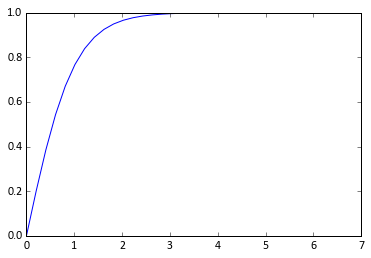

In [214]:
x = np.linspace(0, 2*np.pi, 32)
y = np.tanh(x)
plt.plot(x,y)
plt.show()

In [215]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)


In [216]:
import sympy
dir(sympy)

['Abs',
 'Add',
 'Adjoint',
 'AlgebraicField',
 'AlgebraicNumber',
 'And',
 'AppliedPredicate',
 'AssumptionsContext',
 'Atom',
 'AtomicExpr',
 'BasePolynomialError',
 'Basic',
 'BlockDiagMatrix',
 'BlockMatrix',
 'C',
 'CC',
 'Catalan',
 'Chi',
 'Ci',
 'Circle',
 'CoercionFailed',
 'Complement',
 'ComplexField',
 'ComputationFailed',
 'Contains',
 'CosineTransform',
 'Curve',
 'DeferredVector',
 'Derivative',
 'Determinant',
 'DiagonalMatrix',
 'DiagonalOf',
 'Dict',
 'DiracDelta',
 'Domain',
 'DomainError',
 'Dummy',
 'E',
 'E1',
 'EPath',
 'EX',
 'Ei',
 'Eijk',
 'Ellipse',
 'EmptySet',
 'Eq',
 'Equality',
 'Equivalent',
 'EulerGamma',
 'EvaluationFailed',
 'ExactQuotientFailed',
 'Expr',
 'ExpressionDomain',
 'ExtraneousFactors',
 'FF',
 'FF_gmpy',
 'FF_python',
 'FU',
 'FallingFactorial',
 'FiniteField',
 'FiniteSet',
 'FlagError',
 'Float',
 'FourierTransform',
 'FractionField',
 'Function',
 'FunctionClass',
 'FunctionMatrix',
 'GF',
 'GMPYFiniteField',
 'GMPYIntegerRing',
 'GMPY

In [ ]:
sympy.evaluate?